Purpose of this notebook: Summarize all Julian day DD climatologies for selected stations into a single file. 

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import cm, colors

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

config = {
    "TDD": {
        "deltaT": 32
    },
    "DD20": {
        "deltaT": 20
    },
    "DD25": {
        "deltaT": 25
    },
}

PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / f"data/weatherstations/ACIS/{prefix}/dd_climatologies"

In [ ]:
stations_ddclim = stationdata.glob("*.csv")
stations_ddclim_list = list(stations_ddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_ddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,dd
julian_day,,
60,19.15,0.00
61,21.48,0.00
62,22.74,0.00
63,22.11,0.00
64,23.30,0.00
...,...,...
178,60.15,35.15
179,59.87,34.87
180,60.28,35.28


In [ ]:
stationname = stations_ddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata['dd'].cumsum())
testdf.columns = [stationname]
testdf

,ANCHORAGE_MERRILL_FIELD
julian_day,
60,0.00
61,0.00
62,0.00
63,0.00
64,0.00
...,...
178,2093.64
179,2128.51
180,2163.79


<Axes: xlabel='julian_day', ylabel='ANCHORAGE_MERRILL_FIELD'>

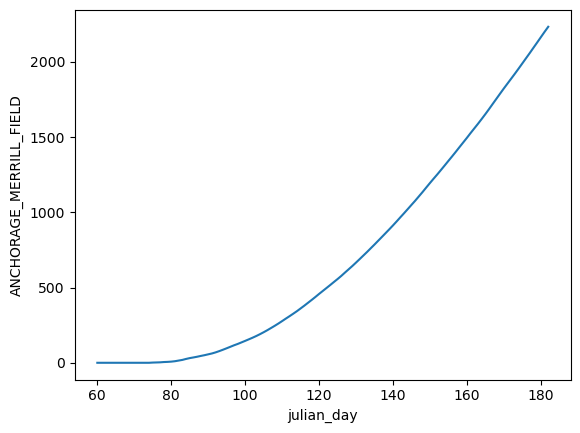

In [ ]:
sb.lineplot(data=testdf[stationname])

### Loop

In [ ]:
alldd = []
for fpth in stations_ddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['dd'].cumsum())
    testdf.columns = [stationname]
    alldd.append(testdf)

Text(0, 0.5, 'Degree days > 25 (F)')

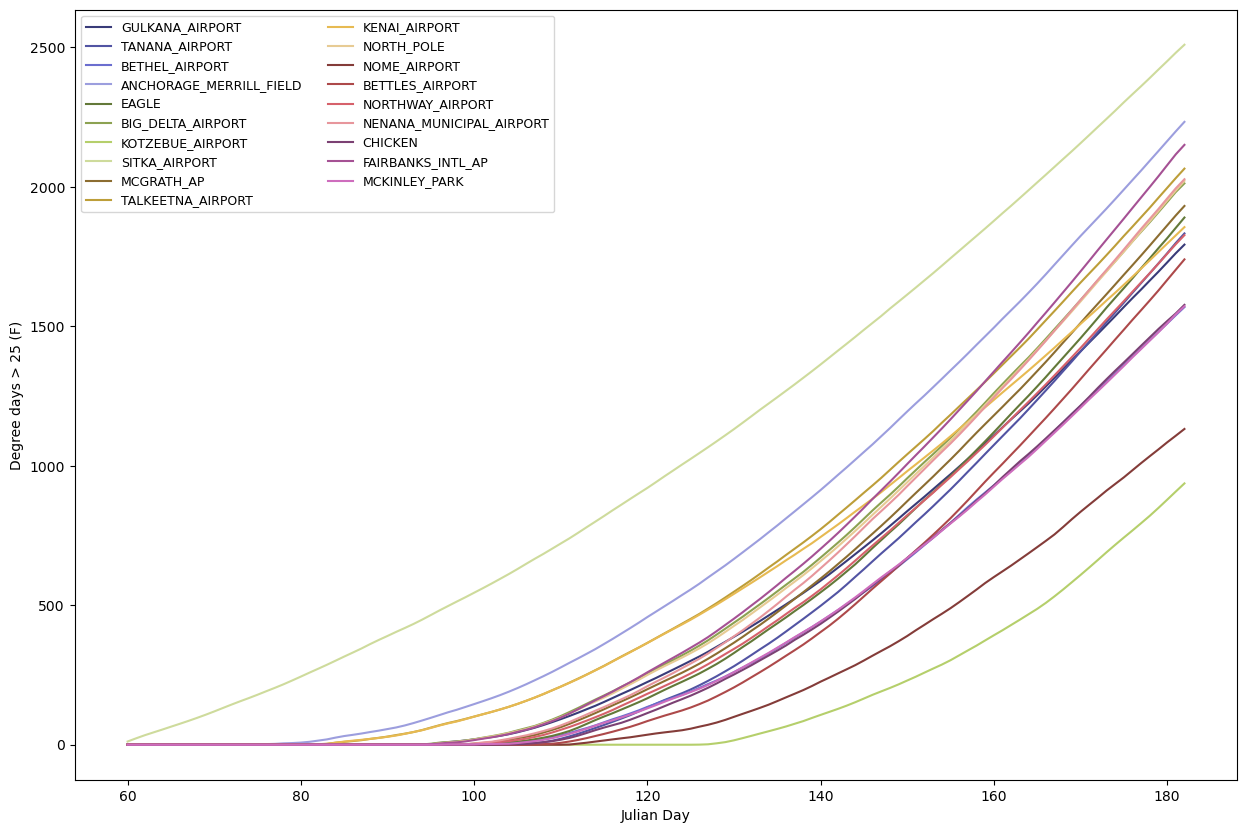

In [ ]:
clrs = plt.cm.rainbow(np.linspace(0, 1, len(alldd)))
clrs = plt.cm.tab20b.colors + plt.cm.tab20c.colors

fig, ax = plt.subplots(figsize=(15, 10))
pd.concat(alldd, axis=1).plot(ax=ax, legend=False, color=clrs)
ax.legend(fontsize=9, ncol=2, loc='upper left')
ax.set_xlabel('Julian Day')
ax.set_ylabel(f'Degree days > {config[prefix]["deltaT"]} (F)')


In [ ]:
allcumulddds = pd.concat(alldd, axis=1)
allcumulddds

,GULKANA_AIRPORT,TANANA_AIRPORT,BETHEL_AIRPORT,ANCHORAGE_MERRILL_FIELD,EAGLE,BIG_DELTA_AIRPORT,KOTZEBUE_AIRPORT,SITKA_AIRPORT,MCGRATH_AP,TALKEETNA_AIRPORT,KENAI_AIRPORT,NORTH_POLE,NOME_AIRPORT,BETTLES_AIRPORT,NORTHWAY_AIRPORT,NENANA_MUNICIPAL_AIRPORT,CHICKEN,FAIRBANKS_INTL_AP,MCKINLEY_PARK
julian_day,,,,,,,,,,,,,,,,,,,
60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1664.23,1690.27,1450.49,2093.64,1743.63,1873.33,820.74,2390.40,1789.57,1925.37,1736.62,1876.60,1034.40,1592.89,1690.51,1885.13,1460.43,1999.80,1449.03
179,1695.90,1725.65,1480.29,2128.51,1780.22,1909.02,849.02,2420.62,1825.57,1960.92,1766.57,1913.18,1058.78,1628.52,1724.68,1920.77,1490.41,2038.03,1478.93
180,1728.83,1761.58,1509.67,2163.79,1815.60,1945.06,878.18,2450.34,1861.45,1996.07,1796.44,1950.54,1083.93,1665.84,1759.73,1957.98,1518.68,2077.36,1510.33


In [ ]:
outpath = PROJPATH / f"data/weatherstations/ACIS/{prefix}/"
fn = "all_cumul_clim1991_2020.csv"

with open(outpath / fn, 'w') as dst:
    dst.write(f"# All climatologies for cumulative degree days > {config[prefix]['deltaT']}, 1991-2020\n")
    dst.write(f"# Cumulative degree days starting March 1 from ACIS, expressed in Julian Day\n")
    dst.write("#\n")
    pd.concat(alldd, axis=1).to_csv(dst, float_format='%.2f')